In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\ACER\\OneDrive\\Desktop\\PythonDesk\\CaseStudy\\Case Study 2 - Credit Card Case Study')
pd.options.display.float_format = '{:.0f}'.format

In [382]:
customer = pd.read_csv('Customer Acqusition.csv')
repayment = pd.read_csv('Repayment.csv')
spend = pd.read_csv('spend.csv')

In [383]:
customer.head(2) 

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC


In [384]:
repayment.head(2) 

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495415,NaN
1,2,A1,3-Jan-04,245899,NaN


In [385]:
spend.head(2) 

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485471
1,2,A1,3-Jan-04,PETRO,410556


## EDA

#### CUSTOMER TABLE

In [386]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [387]:
##drop "No" column from customer - Not required
customer = customer.drop(columns = 'No', axis=1)

In [389]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [79]:
customer.describe()

,Age,Limit
count,100,100
mean,46,284701
std,18,218495
min,12,10000
25%,34,100000
50%,46,300002
75%,60,500000
max,79,500000


In [390]:
customer.describe(include='object').T

,count,unique,top,freq
Customer,100,100,A1,1
City,100,8,COCHIN,20
Product,100,3,Gold,38
Company,100,41,C21,4
Segment,100,5,Govt,29


In [391]:
##value counts of categorical columns
cust_cat = customer.select_dtypes('object').columns
for i in cust_cat:
    print(customer[i].value_counts())
    print('\n')

Customer
A1      1
A64     1
A74     1
A73     1
A72     1
       ..
A31     1
A30     1
A29     1
A28     1
A100    1
Name: count, Length: 100, dtype: int64


City
COCHIN        20
BANGALORE     19
CALCUTTA      18
BOMBAY        14
CHENNAI        8
DELHI          7
PATNA          7
TRIVANDRUM     7
Name: count, dtype: int64


Product
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64


Company
C21    4
C12    4
C22    4
C20    4
C19    4
C18    4
C17    4
C15    4
C14    4
C13    4
C16    4
C11    4
C10    4
C9     4
C8     4
C7     4
C6     4
C5     4
C25    2
C24    2
C23    2
C3     2
C4     2
C40    1
C33    1
C39    1
C38    1
C37    1
C36    1
C35    1
C34    1
C1     1
C32    1
C31    1
C30    1
C29    1
C28    1
C27    1
C26    1
C2     1
C41    1
Name: count, dtype: int64


Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64




In [302]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [392]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

## Univariate Analysis - Customer

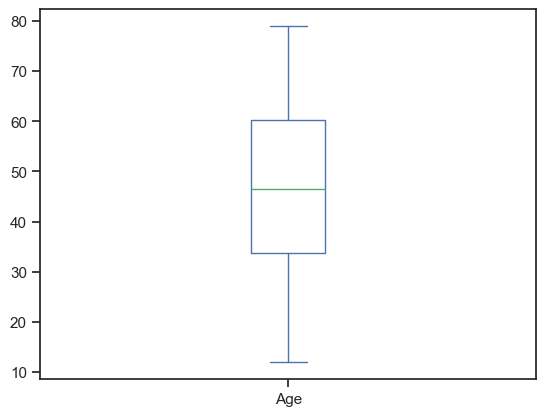

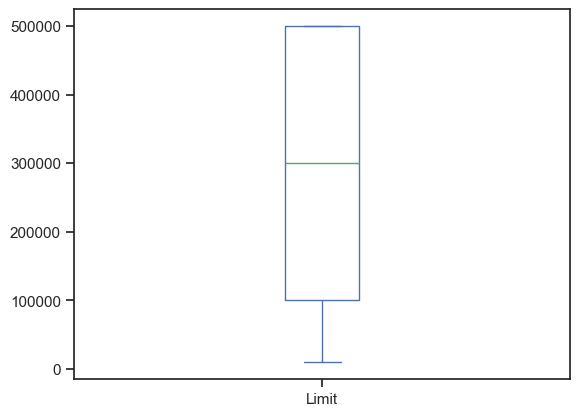

In [323]:
## CReating boxplot
for i in customer.select_dtypes('number').columns:
    customer[i].plot(kind = 'box')
    plt.show()

### NO OUTLIERS PRESENT

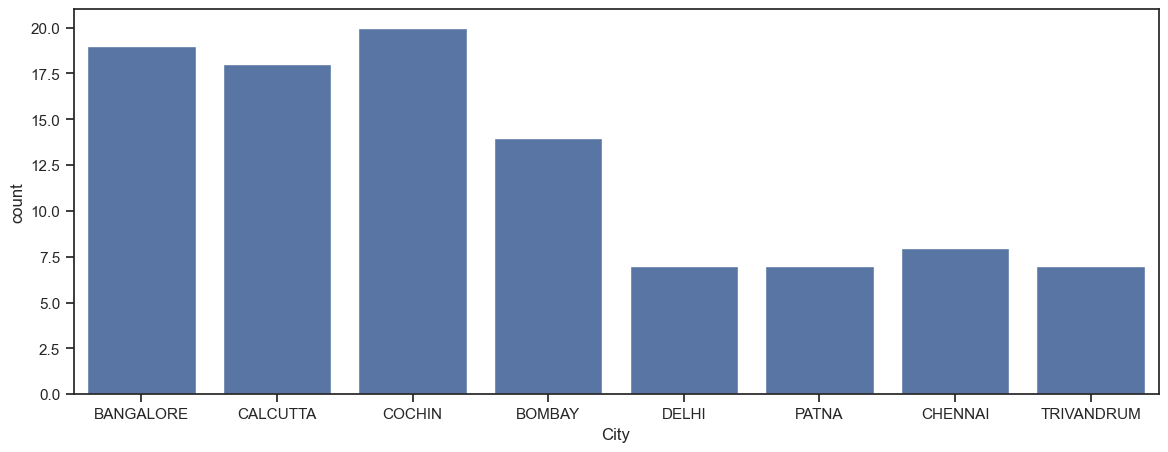

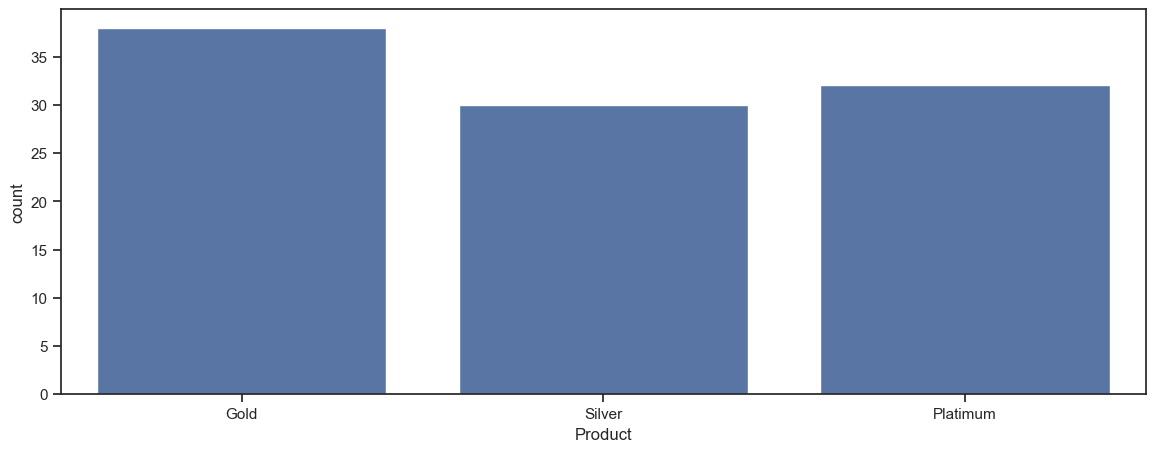

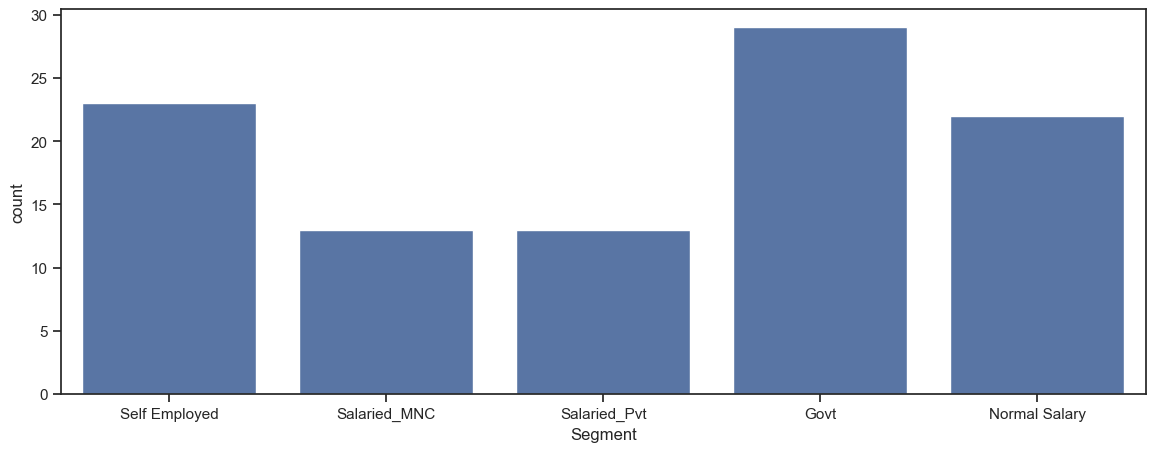

In [125]:
## Checking frequency of categorical variable
for i in customer.select_dtypes('object').drop(columns = ['Customer','Company'], axis = 1).columns:
    plt.figure(figsize=(14,5))
    sns.countplot(data = customer, x = i)
    plt.show()

MAXimum customer are GOVT EMPLOYEE 
Most of them carry product GOLD and
Cochin is where max customer belong to followed by Bangalore and Calcutta

## Bivariate Analysis - Customer

In [110]:
##USING CORR()
customer.select_dtypes('number').corr()

,Age,Limit
Age,1,0
Limit,0,1


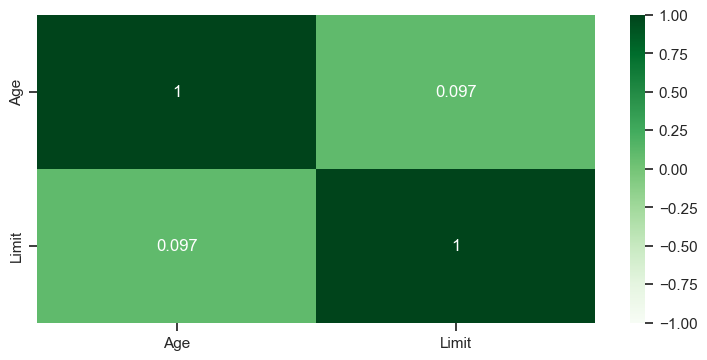

In [111]:
plt.figure(figsize= (9,4))
sns.heatmap(data= customer.select_dtypes('number').corr(), annot= True, vmin=-1, vmax= 1, cmap='Greens')
plt.show()

#### SPEND TABLE

In [324]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485471
1,2,A1,3-Jan-04,PETRO,410556
2,3,A1,15-Jan-04,CLOTHES,23740
3,4,A1,25-Jan-04,FOOD,484342
4,5,A1,17-Jan-05,CAMERA,369694


In [393]:
##drop "Sl No:" column from "spend" - No need
spend = spend.drop(columns = 'Sl No:', axis=1)

In [394]:
##change the type of month column from object to datetime in spend table
spend.Month = pd.to_datetime(spend.Month)

In [395]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [396]:
spend.describe().drop('Month', axis=1).T

,count,mean,min,25%,50%,75%,max,std
Amount,1500,243096,720,122606,239210,361618,499793,141350


In [330]:
spend.describe(include = 'object').T

,count,unique,top,freq
Customer,1500,100,A61,38
Type,1500,15,PETRO,200


In [331]:
spend.dtypes

Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [96]:
##value counts of categorical columns
spend_cat = spend.select_dtypes('object').columns
for i in spend_cat:
    print(spend[i].value_counts())
    print('\n')

Customer
A61    38
A60    38
A22    33
A21    33
A41    31
       ..
A83     1
A85     1
A86     1
A87     1
A80     1
Name: count, Length: 100, dtype: int64


Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: count, dtype: int64




## UNIVARIATE ANALYSIS - SPEND TABLE

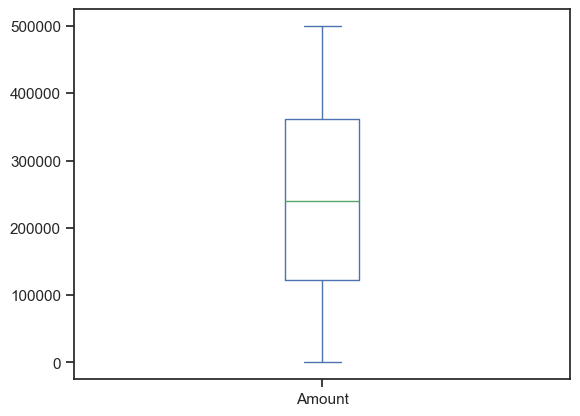

In [114]:
## creating boxplot
for i in spend.select_dtypes('number').columns:
    spend[i].plot(kind = 'box')
    plt.show()

### NO OUTLIERS PRESENT - SPEND

In [126]:
## Checking frequency of categorical variable

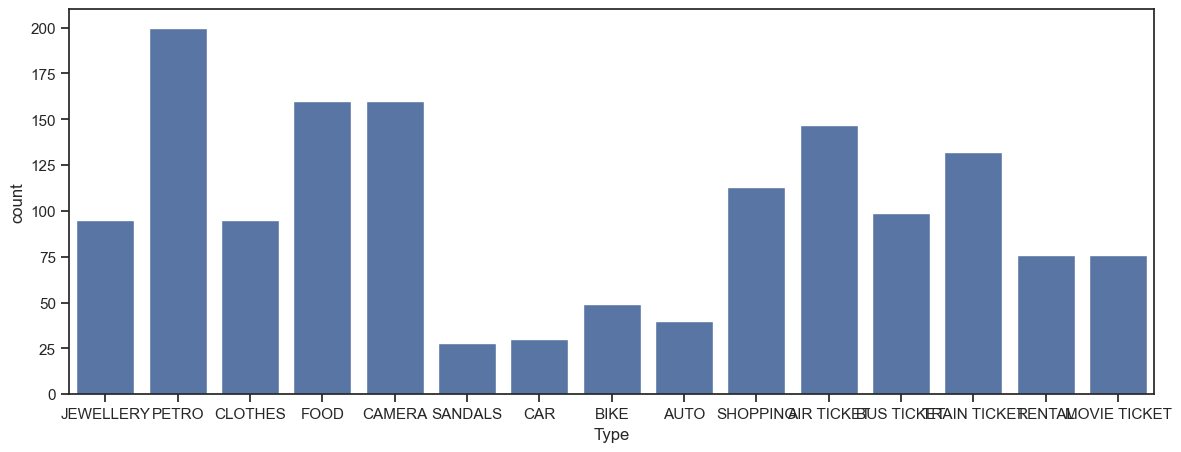

In [128]:
for i in spend.select_dtypes('object').drop(columns = ['Customer'], axis = 1).columns:
    plt.figure(figsize=(14,5))
    sns.countplot(data = spend, x = i)
    plt.show()

In [ ]:
Customers spend max amount on PETROL followed by FOOD and CAMERA

#### BIVARIATE ANALYSIS

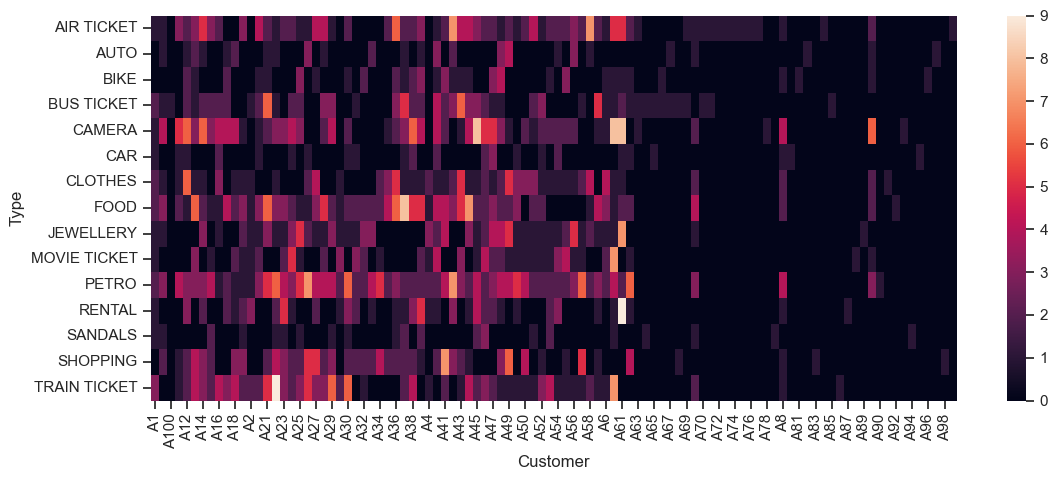

In [140]:
##Creating heatmap:
cust_type = pd.crosstab(spend.Type, spend.Customer)
plt.figure(figsize = (13,5))
sns.heatmap(data = cust_type)
plt.show()

In [397]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

#### REPAYMENT TABLE

In [333]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495415,NaN
1,2,A1,3-Jan-04,245899,NaN
2,3,A1,15-Jan-04,259490,NaN
3,4,A1,25-Jan-04,437555,NaN
4,5,A1,17-Jan-05,165973,NaN


In [398]:
##drop "SL No:" and "Unnamed: 4" column from customer - No need
repayment = repayment.drop(columns = ['SL No:','Unnamed: 4'], axis = 1)

In [399]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [336]:
##checking any null values in any columns in repayment
repayment[repayment.isnull().any(axis = 1)]

,Customer,Month,Amount
1500,NaN,NaN,NaN
1501,NaN,NaN,NaN
1502,NaN,NaN,NaN
1503,NaN,NaN,NaN
1504,NaN,NaN,NaN
1505,NaN,NaN,NaN
1506,NaN,NaN,NaN
1507,NaN,NaN,NaN
1508,NaN,NaN,NaN
1509,NaN,NaN,NaN


In [400]:
## droping the rows having NULL values in repayment table- 
repayment.dropna(axis=0, inplace=True)

In [401]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [402]:
##change the type of month column from object to datetime in repayment table
repayment.Month = pd.to_datetime(repayment.Month)

In [403]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [341]:
repayment.describe().drop('Month', axis = 1).T

,count,mean,min,25%,50%,75%,max,std
Amount,1500,247890,56,118605,248008,367237,499931,145290


In [342]:
repayment.describe(include='object').T

,count,unique,top,freq
Customer,1500,100,A61,38


In [102]:
##value counts of categorical columns
repayment_cat = repayment.select_dtypes('object').columns
for i in repayment_cat:
    print(repayment[i].value_counts())
    print('\n')

Customer
A61    38
A60    38
A22    33
A21    33
A41    31
       ..
A83     1
A85     1
A86     1
A87     1
A80     1
Name: count, Length: 100, dtype: int64




In [343]:
repayment.head()

,Customer,Month,Amount
0,A1,2004-01-12,495415
1,A1,2004-01-03,245899
2,A1,2004-01-15,259490
3,A1,2004-01-25,437555
4,A1,2005-01-17,165973


#### UNIVARIATE ANALYSIS

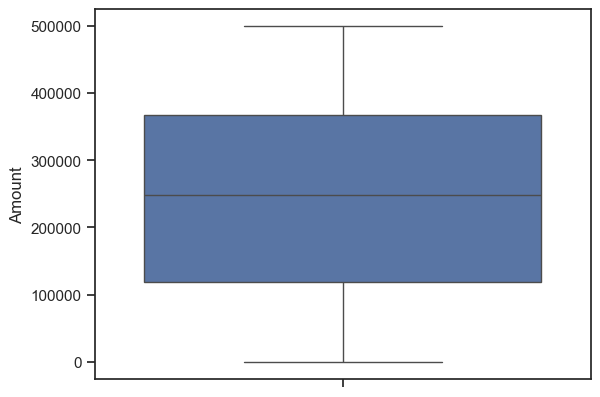

In [272]:
## creating boxplot of numerical cols
for i in repayment.select_dtypes('number').columns:
    sns.boxplot(data = repayment[i])
    plt.show()

### NO OUTLIERS PRESENT - REPAYMENT

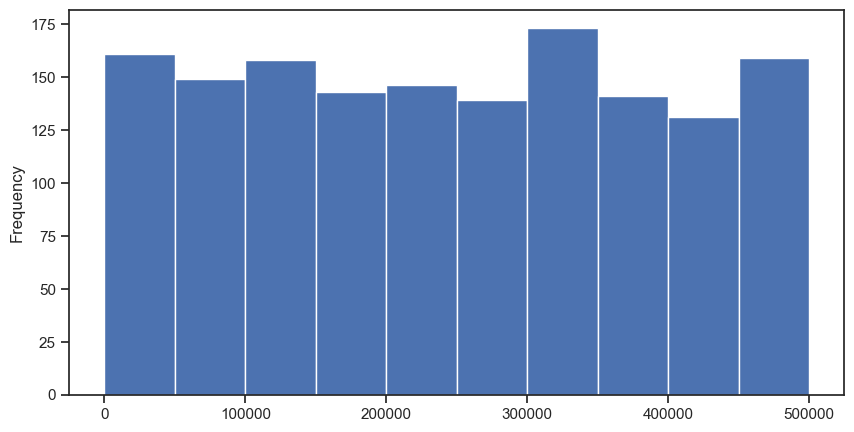

In [146]:
plt.figure(figsize = (10,5))
repayment.Amount.plot(kind='hist')
plt.show()

#### BIVARIATE ANALYSIS

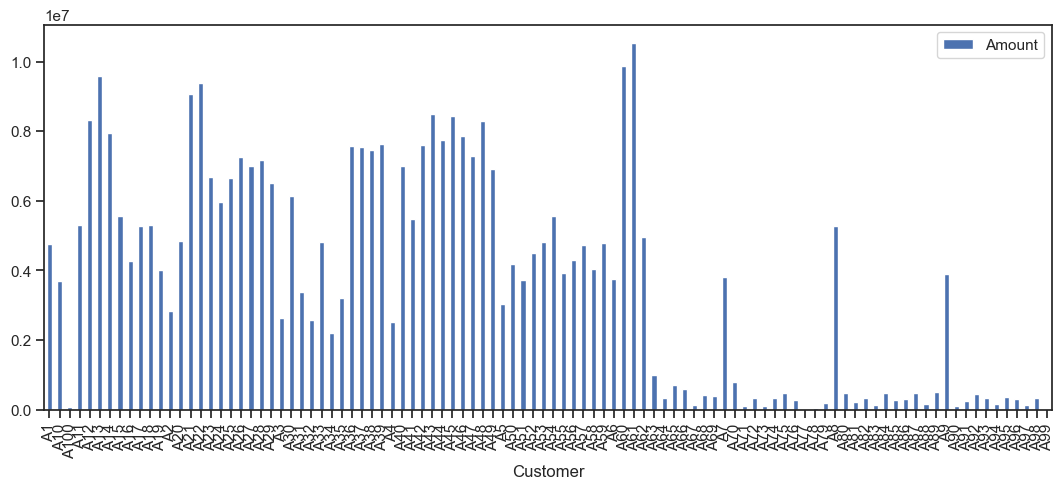

In [149]:
cust_repay = repayment[['Customer','Amount']].groupby('Customer').sum()
cust_repay.plot(kind = 'bar', figsize = (13,5))
plt.show()

In [344]:
repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

## EDA ENDS --

In [ ]:
## Q1. In the above dataset,

In [ ]:
## a. In case age is less than 18, replace it with mean of age values.

In [416]:
customer.loc[(customer.Age<18),'Age'] = customer.Age.mean()

In [419]:
customer.loc[(customer.Age<18)]

,Customer,Age,City,Product,Limit,Company,Segment


In [284]:
## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
##(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [420]:
## Merge customer and spend tables
cust_spend = pd.merge(left = spend, right =customer , on = 'Customer')

In [421]:
cust_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
 4   Age       1500 non-null   float64       
 5   City      1500 non-null   object        
 6   Product   1500 non-null   object        
 7   Limit     1500 non-null   float64       
 8   Company   1500 non-null   object        
 9   Segment   1500 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 117.3+ KB


In [423]:
## fetching rows where amount is more than limit
cust_spend[cust_spend.Amount > cust_spend.Limit]

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
7,A8,2004-02-05,BIKE,155563,67,PATNA,Silver,100002,C8,Salaried_Pvt
18,A19,2005-04-04,FOOD,441442,27,BANGALORE,Platimum,10000,C19,Salaried_Pvt
19,A20,2006-04-30,JEWELLERY,356733,27,CALCUTTA,Platimum,10001,C20,Govt
20,A21,2004-04-25,PETRO,190012,57,COCHIN,Platimum,10002,C21,Normal Salary
21,A22,2006-04-19,CLOTHES,423672,27,BOMBAY,Silver,100000,C22,Self Employed
...,...,...,...,...,...,...,...,...,...,...
1485,A59,2004-01-15,FOOD,181115,74,BANGALORE,Silver,100003,C21,Normal Salary
1496,A68,2006-03-25,BUS TICKET,204971,46,TRIVANDRUM,Silver,100000,C30,Self Employed
1497,A69,2006-03-31,BUS TICKET,50449,33,CALCUTTA,Platimum,10000,C31,Self Employed
1498,A70,2006-03-23,BUS TICKET,80594,46,BOMBAY,Platimum,10001,C32,Self Employed


In [424]:
## replacing amount with 50% of limit where amount is > limit
cust_spend.Amount = np.where(cust_spend.Amount > cust_spend.Limit, cust_spend.Limit/2, cust_spend.Amount)

In [425]:
## again checking rows where amouont is more than limit
cust_spend[cust_spend.Amount > cust_spend.Limit]

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment


In [ ]:
##c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [426]:
##merge customer with repayment
cust_repay = pd.merge(left = repayment, right = customer, on = 'Customer')

In [427]:
cust_repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
 3   Age       1500 non-null   float64       
 4   City      1500 non-null   object        
 5   Product   1500 non-null   object        
 6   Limit     1500 non-null   float64       
 7   Company   1500 non-null   object        
 8   Segment   1500 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 105.6+ KB


In [428]:
## fetching rows where amount is more than limit
cust_repay[cust_repay.Amount > cust_repay.Limit]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
7,A8,2004-02-05,156914,67,PATNA,Silver,100002,C8,Salaried_Pvt
8,A9,2005-02-28,417295,79,CHENNAI,Silver,100003,C9,Govt
17,A18,2006-03-05,213352,34,BANGALORE,Silver,100000,C18,Salaried_MNC
18,A19,2005-04-04,347826,27,BANGALORE,Platimum,10000,C19,Salaried_Pvt
19,A20,2006-04-30,471099,27,CALCUTTA,Platimum,10001,C20,Govt
...,...,...,...,...,...,...,...,...,...
1483,A57,2004-03-19,207786,37,TRIVANDRUM,Silver,100001,C19,Normal Salary
1496,A68,2006-05-10,319836,46,TRIVANDRUM,Silver,100000,C30,Self Employed
1497,A69,2006-07-11,247628,33,CALCUTTA,Platimum,10000,C31,Self Employed
1498,A70,2005-08-12,454017,46,BOMBAY,Platimum,10001,C32,Self Employed


In [429]:
##Replacing the repayment amount with limit if it is more than limit
cust_repay.Amount = np.where(cust_repay.Amount > cust_repay.Limit, cust_repay.Limit, cust_repay.Amount)

In [430]:
## again checking
cust_repay[cust_repay.Amount > cust_repay.Limit]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


In [ ]:
##2. From the above dataset create the following summaries:

In [ ]:
##  a. How many distinct customers exist?

In [431]:
print('The count of DISTINCT CUSTOMER is')
customer.Customer.nunique()

The count of DISTINCT CUSTOMER is


100

In [ ]:
## b. How many distinct categories exist?

In [436]:
print('Product - Count of Distinct Categories is')
customer.Product.nunique()

Product - Count of Distinct Categories is


3

In [437]:
print('Segment - Count of Distinct Categories is')
customer.Segment.nunique()

Segment - Count of Distinct Categories is


5

In [438]:
customer.Product.unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [439]:
customer.Segment.unique()

array(['Self Employed', 'Salaried_MNC', 'Salaried_Pvt', 'Govt',
       'Normal Salary'], dtype=object)

In [ ]:
## c. What is the average monthly spend by customers?

In [450]:
##renaming Month column in cust_spend table to 'Spend_dt'
cust_spend.rename(columns = {'Month' : 'Spend_dt'}, inplace=True)

In [458]:
## creating new column as Month and Year
cust_spend['Month'] =  cust_spend.Spend_dt.dt.month
cust_spend['Year'] = cust_spend.Spend_dt.dt.year

In [464]:
##Calculating Average monthly Spend by year nd month for each customer
cust_spend[['Customer','Year','Month','Amount']].groupby(by = ['Customer','Year','Month']).mean().\
rename(columns={'Amount':'Avg_Monthly_Spend'}).reset_index()

,Customer,Year,Month,Avg_Monthly_Spend
0,A1,2004,1,373274
1,A1,2004,2,52209
2,A1,2004,5,361141
3,A1,2005,1,369694
4,A1,2005,2,205992
...,...,...,...,...
802,A95,2004,1,240402
803,A96,2004,1,54730
804,A97,2004,1,5000
805,A98,2004,1,5000


In [ ]:
## d. What is the average monthly repayment by customers?

In [466]:
##renaming Month column in cust_repay table as 'Repay_dt'
cust_repay.rename(columns = {'Month' : 'Repay_dt'}, inplace=True)

In [478]:
## adding new columns as month and year
cust_repay['Month'] = cust_repay.Repay_dt.dt.month
cust_repay['Year'] = cust_repay.Repay_dt.dt.year

In [ ]:
## Calculating avg monthly repayment by each customer monthwise

In [482]:
cust_repay[['Customer','Year','Month','Amount']].groupby(['Customer','Year','Month']).mean().\
rename(columns = {'Amount':'Avg_Monthly_Repay'}).reset_index()

,Customer,Year,Month,Avg_Monthly_Repay
0,A1,2004,1,373639
1,A1,2004,2,117964
2,A1,2005,1,165973
3,A1,2005,2,165977
4,A1,2005,7,297177
...,...,...,...,...
793,A95,2004,1,369406
794,A96,2004,1,100000
795,A97,2004,1,10000
796,A98,2004,1,10001


In [ ]:
## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
## (Profit is defined as interest earned on Monthly Profit. 
## Monthly Profit = Monthly repayment – Monthly spend. 
## Interest is earned only on positive profits and not on negative amounts)

In [490]:
## CREATING two NEW DATAFRAME WITH MONTHWISE spend and repayment
monthly_spend = cust_spend[['Year','Month','Amount']].groupby(['Year','Month']).sum().rename(columns = {'Amount':'Monthly_Spend'}).reset_index()

In [491]:
monthly_repay = cust_repay[['Year','Month','Amount']].groupby(['Year','Month']).sum().rename(columns = {'Amount':'Monthly_Repay'}).reset_index()

In [495]:
##now merging both tables on year and month columns
monthly_tran = pd.merge(left = monthly_repay, right = monthly_spend, on = ['Year','Month'])

In [497]:
## adding new column to monthly_tran as monthly profit
monthly_tran.loc[:,'Monthy_Profit'] = monthly_tran.Monthly_Repay - monthly_tran.Monthly_Spend

In [500]:
##Calculating actual profit with inerest of 2.9% for positive monthly_profits
monthly_tran['Actual_Profit'] = np.where(monthly_tran.Monthy_Profit > 0, monthly_tran.Monthy_Profit*2.9/100,0)

In [501]:
monthly_tran

,Year,Month,Monthly_Repay,Monthly_Spend,Monthy_Profit,Actual_Profit
0,2004,1,44792021,44279812,512209,14854
1,2004,2,3391538,3835952,-444414,0
2,2004,3,2666519,1871913,794606,23044
3,2004,4,5268980,3489415,1779564,51607
4,2004,5,3782760,2146577,1636183,47449
5,2004,9,1902816,2402110,-499293,0
6,2004,11,1788399,1114989,673410,19529
7,2005,1,4894040,5383607,-489567,0
8,2005,2,25491800,25928183,-436383,0
9,2005,4,3634904,4100066,-465162,0


In [503]:
## f. What are the top 5 product types?

In [516]:
cust_spend.head()

,Customer,Spend_dt,Type,Amount,Age,City,Product,Limit,Company,Segment,Month,Year
0,A1,2004-01-12,JEWELLERY,485471,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
1,A1,2004-01-03,PETRO,410556,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
2,A1,2004-01-15,CLOTHES,23740,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
3,A1,2004-01-25,FOOD,484342,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
4,A1,2005-01-17,CAMERA,369694,76,BANGALORE,Gold,500000,C1,Self Employed,1,2005


In [524]:
print('Top 5 product types are')
cust_spend.groupby('Type').Amount.sum().reset_index().sort_values('Amount', ascending = False).head()

Top 5 product types are


,Type,Amount
10,PETRO,28597385
4,CAMERA,27690738
7,FOOD,20519244
0,AIR TICKET,20155847
14,TRAIN TICKET,19995826


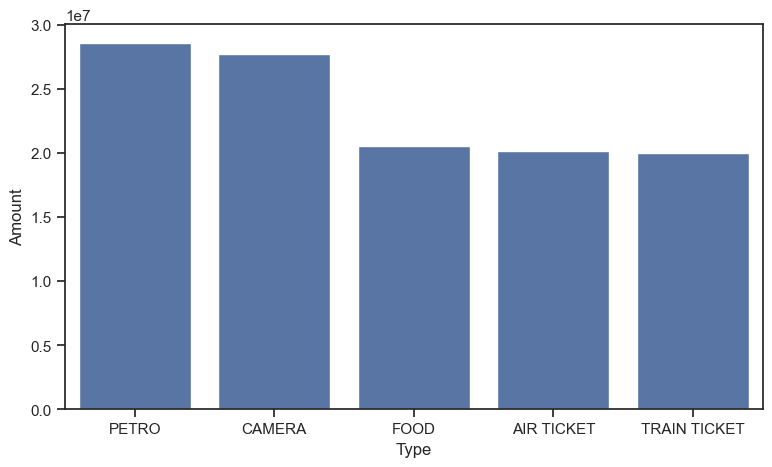

In [539]:
top5 = cust_spend.groupby('Type').Amount.sum().reset_index().sort_values('Amount', ascending = False).head()
plt.figure(figsize=(9,5))
sns.barplot(data = top5, x='Type', y='Amount')
plt.show()

In [ ]:
##  g. Which city is having maximum spend?

In [526]:
cust_spend.head()

,Customer,Spend_dt,Type,Amount,Age,City,Product,Limit,Company,Segment,Month,Year
0,A1,2004-01-12,JEWELLERY,485471,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
1,A1,2004-01-03,PETRO,410556,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
2,A1,2004-01-15,CLOTHES,23740,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
3,A1,2004-01-25,FOOD,484342,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
4,A1,2005-01-17,CAMERA,369694,76,BANGALORE,Gold,500000,C1,Self Employed,1,2005


In [536]:
print('City with maximum spend is')
cust_spend.groupby('City')[['Amount']].sum().reset_index().sort_values('Amount', ascending=False).rename(columns={'Amount':'Spend'}).head(1)

City with maximum spend is


,City,Spend
4,COCHIN,45963514


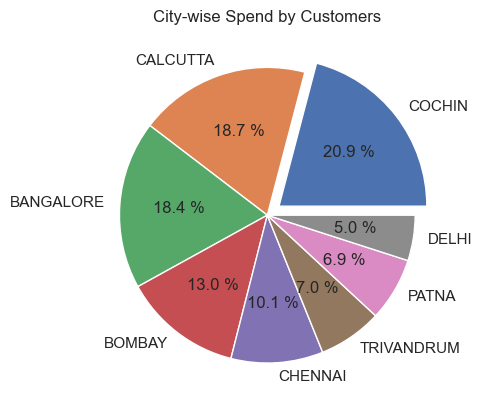

In [562]:
city_spend = cust_spend.groupby('City')[['Amount']].sum().reset_index().sort_values('Amount', ascending=False).rename(columns={'Amount':'Spend'})
plt.pie(city_spend.Spend, labels = city_spend.City, autopct='%0.1f %%', explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0] )
plt.title('City-wise Spend by Customers')
plt.show()

In [ ]:
##  h. Which age group is spending more money?

In [537]:
cust_spend.head()

,Customer,Spend_dt,Type,Amount,Age,City,Product,Limit,Company,Segment,Month,Year
0,A1,2004-01-12,JEWELLERY,485471,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
1,A1,2004-01-03,PETRO,410556,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
2,A1,2004-01-15,CLOTHES,23740,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
3,A1,2004-01-25,FOOD,484342,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
4,A1,2005-01-17,CAMERA,369694,76,BANGALORE,Gold,500000,C1,Self Employed,1,2005


In [545]:
##creating new column as Age_Group
cust_spend['Age_Group'] = pd.cut(cust_spend.Age, bins = [10,20,30,40,50,60,70,80], labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79'])

In [548]:
cust_spend.head()

,Customer,Spend_dt,Type,Amount,Age,City,Product,Limit,Company,Segment,Month,Year,Age_Group
0,A1,2004-01-12,JEWELLERY,485471,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
1,A1,2004-01-03,PETRO,410556,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
2,A1,2004-01-15,CLOTHES,23740,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
3,A1,2004-01-25,FOOD,484342,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
4,A1,2005-01-17,CAMERA,369694,76,BANGALORE,Gold,500000,C1,Self Employed,1,2005,70-79


In [579]:
##calculating the spend based on age groups
print('Age Group with max spend is')
cust_spend.groupby('Age_Group').Amount.sum().reset_index().sort_values('Amount', ascending=False).head(1)

Age Group with max spend is


,Age_Group,Amount
3,40-49,57048362


In [ ]:
## i. Who are the top 10 customers in terms of repayment?

In [580]:
cust_repay.head()

,Customer,Repay_dt,Amount,Age,City,Product,Limit,Company,Segment,Month,Year
0,A1,2004-01-12,495415,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
1,A1,2004-01-03,245899,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
2,A1,2004-01-15,259490,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
3,A1,2004-01-25,437555,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004
4,A1,2005-01-17,165973,76,BANGALORE,Gold,500000,C1,Self Employed,1,2005


In [587]:
print('Top 10 customers in terms of repayment are')
cust_repay[['Customer','Amount']].groupby('Customer').sum().sort_values('Amount', ascending=False).head(10).reset_index()

Top 10 customers in terms of repayment are


,Customer,Amount
0,A61,10539143
1,A60,9876291
2,A13,9572001
3,A43,8489871
4,A45,8448335
5,A12,8334760
6,A14,7943269
7,A44,7744730
8,A39,7622483
9,A42,7615461


In [ ]:
## Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [588]:
cust_spend.head(5)

,Customer,Spend_dt,Type,Amount,Age,City,Product,Limit,Company,Segment,Month,Year,Age_Group
0,A1,2004-01-12,JEWELLERY,485471,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
1,A1,2004-01-03,PETRO,410556,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
2,A1,2004-01-15,CLOTHES,23740,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
3,A1,2004-01-25,FOOD,484342,76,BANGALORE,Gold,500000,C1,Self Employed,1,2004,70-79
4,A1,2005-01-17,CAMERA,369694,76,BANGALORE,Gold,500000,C1,Self Employed,1,2005,70-79


In [602]:
yearly_citywise_spend = cust_spend.pivot_table(index='City', columns=['Year','Product'], values='Amount', aggfunc='sum')

In [603]:
yearly_citywise_spend

Year          2004                      2005                     2006  \
Product       Gold Platimum  Silver     Gold Platimum Silver     Gold   
City                                                                    
BANGALORE  9289879  1112732 1291853 12892363   912285 830612 12030611   
BOMBAY     6987854   897265  532089  8983018   711805 508989  7917144   
CALCUTTA   7477141  2037690  500006 10303356  4434696 440147 11167533   
CHENNAI    1059618  3535652  282057  3740946  5053956 377184  2704289   
COCHIN     7315850  3419904  814230 12110613  4960922 652269 10499142   
DELHI      2806495   283513  768172  1964845   494158 612311  2957103   
PATNA      2072568  1113070  756684  3252616  2883231 950094  2276182   
TRIVANDRUM 2415103  2161677  209667  1240376  3601443 269913  2735711   

Year                         
Product    Platimum  Silver  
City                         
BANGALORE    685831 1415481  
BOMBAY       972130 1092834  
CALCUTTA    3589607 1157956  
CHENNAI     5024923  350010  
COCHIN      4920592 1269991  
DELHI        176789  854900  
PATNA       1256138  700005  
TRIVANDRUM  2147404  555862

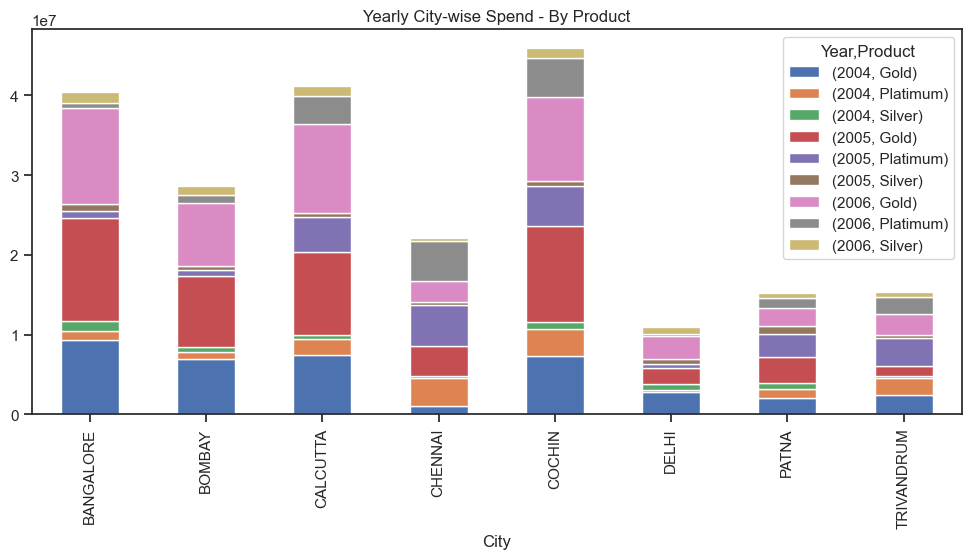

In [608]:
yearly_citywise_spend.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title('Yearly City-wise Spend - By Product')
plt.show()

In [ ]:
## Q4. Create graphs for

In [ ]:
## a. Monthly comparison of total spends, city wise

In [614]:
##adding month name to cust_spend table
cust_spend['Month_Name'] = cust_spend.Spend_dt.dt.strftime('%B')

In [615]:
monthly_citywise_spend = cust_spend.pivot_table(index='City', columns=['Month_Name'], values='Amount', aggfunc='sum')

In [616]:
monthly_citywise_spend

Month_Name,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980,695062,422167,6734495,9041797,2228218,1330686,5362903,6383115,2260603,1091603,703018
BOMBAY,1873785,1066745,140041,4276988,5948993,177726,1172595,5227850,3891946,2872049,676006,1278403
CALCUTTA,3457508,1548354,55002,8150546,9064865,2234573,2293046,4939040,5578247,2078881,196358,1511714
CHENNAI,2518657,305876,223628,4385816,4466961,693826,1244242,3183644,2856200,1347779,156247,745759
COCHIN,3882745,2317307,909533,5747886,11714374,1290897,2495745,5645147,6581086,3128000,868552,1382243
DELHI,777241,155402,842342,1494064,2714261,50002,511276,2267149,1600322,391611,64615,50001
PATNA,2338180,419384,50000,2353334,4916206,50000,746186,1437167,2136587,413678,329537,70330
TRIVANDRUM,1199293,453774,640922,2857124,3704337,260484,400337,2392317,2813534,143387,285582,186064


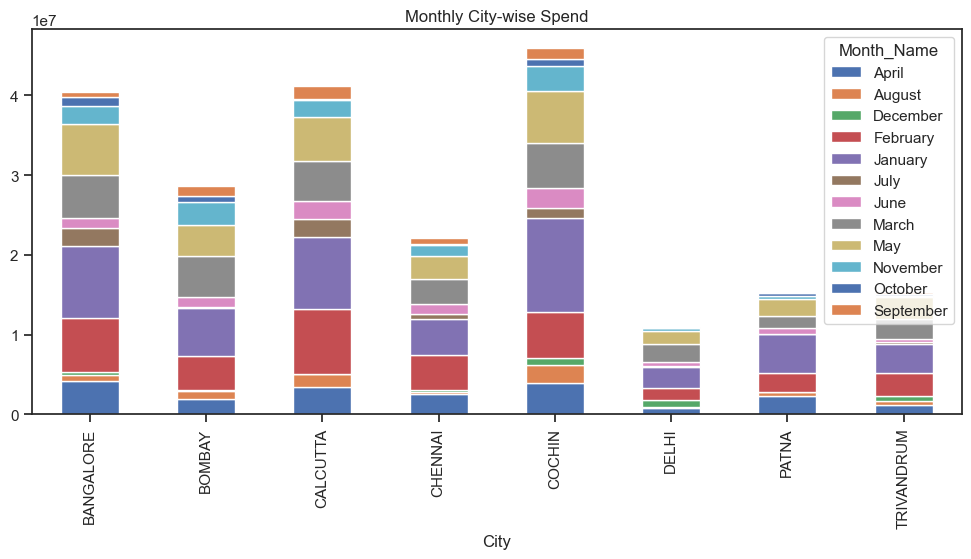

In [618]:
monthly_citywise_spend.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title('Monthly City-wise Spend')
plt.show()

In [ ]:
##  b. Comparison of yearly spend on air tickets

In [620]:
cust_spend.Type.unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'BIKE', 'AUTO', 'SHOPPING', 'AIR TICKET', 'BUS TICKET',
       'TRAIN TICKET', 'RENTAL', 'MOVIE TICKET'], dtype=object)

In [624]:
yearly_airtkts = cust_spend[cust_spend.Type == 'AIR TICKET'].pivot_table(index='Year',  values='Amount', aggfunc='sum')

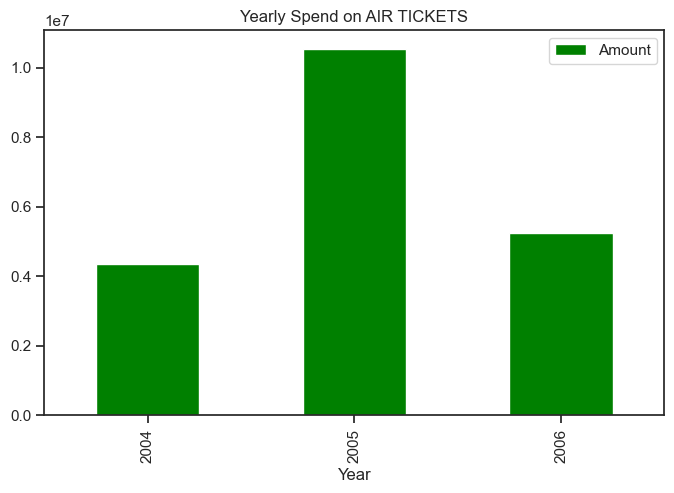

In [626]:
yearly_airtkts.plot(kind='bar', figsize=(8,5), color='green')
plt.title('Yearly Spend on AIR TICKETS')
plt.show()

In [ ]:
## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

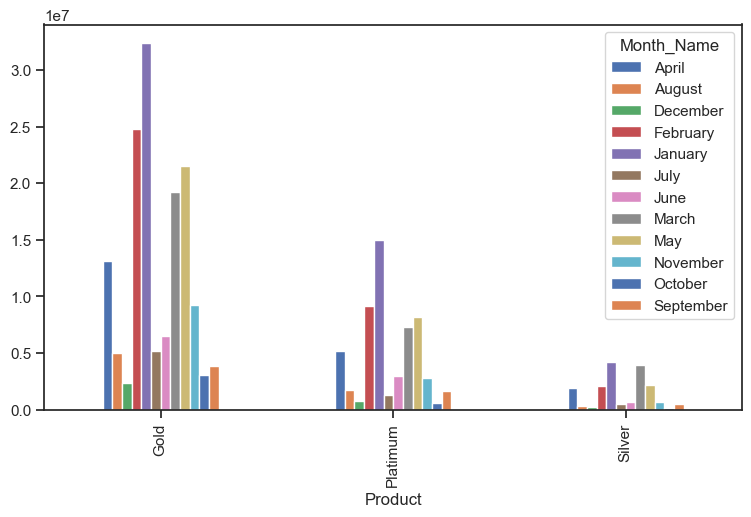

In [630]:
cust_spend.pivot_table(index='Product', columns='Month_Name', values='Amount', aggfunc='sum').plot(kind='bar', figsize=(9,5))
plt.show()

## All products is showing highest SPEND in January month.
## Gold dominates among all the products with high spend in month of February, March and May

In [631]:
## Q5. Write user defined PYTHON function to perform the following analysis:

In [ ]:
You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods
i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [661]:
cust_repay.rename(columns = {'Year':'yearly','Month':'monthly'}, inplace=True)

In [650]:
def top10(prod, time):
    time_df = cust_repay[(cust_repay.Product == prod)]
    return time_df.groupby(['City','Customer','Product',time]).Amount.sum().reset_index().sort_values(by='Amount', ascending=False).head(10)

In [665]:
prod = str(input("Please Enter Product Category as Gold/Silver/Platinum: "))
time = str(input("Please Enter Time Period as yearly/monthly: "))

Please Enter Product Category as Gold/Silver/Platinum:  Gold
Please Enter Time Period as yearly/monthly:  monthly


In [666]:
top10(prod,time)

,City,Customer,Product,monthly,Amount
166,COCHIN,A61,Gold,4,3412861
73,BOMBAY,A42,Gold,5,3305341
31,BANGALORE,A30,Gold,5,3086549
101,CALCUTTA,A29,Gold,5,2612140
69,BOMBAY,A42,Gold,1,2516249
108,CALCUTTA,A60,Gold,1,2465585
177,DELHI,A44,Gold,1,2415713
0,BANGALORE,A1,Gold,1,2407806
111,CALCUTTA,A60,Gold,4,2397566
207,TRIVANDRUM,A28,Gold,5,2233253


## --Credit Card Case Study-- END